In [1]:
import pandas as pd

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.11.3.final.0
python-bits      : 32
OS               : Emscripten
OS-release       : 3.1.45
Version          : #1
machine          : wasm32
processor        : 
byteorder        : little
LC_ALL           : None
LANG             : zh_TW.UTF-8
LOCALE           : zh_TW.UTF-8

pandas           : 1.5.3
numpy            : 1.25.2
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : None
pip              : None
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : None
IPython          : 8.16.1
pandas_datareader: None
bs4              : None
bottleneck       : None
brotli           : None
fastparquet      : None
fsspec           : None


In [5]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

lables = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index = lables)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [4]:
df.head()


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 280.0+ bytes


In [6]:
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [7]:
df[df['visits'] > 2]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [8]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [10]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [11]:
df.loc['f', 'age'] = 1.5

In [12]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,1.5,3,no


In [13]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [14]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [15]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [16]:
df['priority'] = df['priority'].map({'yes':True, 'no':False})

In [19]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False


In [21]:
df['animal'] = df['animal'].replace('snake', 'tang')
df.head()

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,tang,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False


In [6]:
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [8]:
df.pivot_table(index='animal', columns = 'visits', values = 'age', aggfunc = 'mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


In [11]:
df = pd.DataFrame(np.random.random(size = (5,3)))
df

,0,1,2
0,0.494181,0.059736,0.465086
1,0.653294,0.580814,0.942313
2,0.477290,0.060456,0.141927
3,0.297386,0.913200,0.281273
4,0.289404,0.487802,0.493729


In [12]:
# 先取row的平均數(axis=1), 再將原本的數據減去此平均數(axis=0)
df.sub(df.mean(axis = 1), axis = 0)

,0,1,2
0,0.154513,-0.279932,0.125419
1,-0.072180,-0.144660,0.216840
2,0.250732,-0.166102,-0.084630
3,-0.199900,0.415914,-0.216013
4,-0.134241,0.064157,0.070084


In [13]:
df.sub(df.mean(axis = 0), axis = 1)

,0,1,2
0,0.051870,-0.360666,0.000221
1,0.210983,0.160412,0.477448
2,0.034979,-0.359946,-0.322939
3,-0.144925,0.492798,-0.183593
4,-0.152907,0.067401,0.028863


In [9]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]})
df 


,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [4]:
# df.duplicated(keep=False)計算重複屬性, 
# Default: first, 重複的第二個之後設定為True ; False: 只要重複都設定為True ; 
# last: 重複的第一個設定為 True

df.duplicated(keep = False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [5]:
len(df) - df.duplicated(keep = False).sum()

3

In [13]:
# 返回DataFrame, 但去除重複值
df.drop_duplicates(keep=False)

,brand,style,rating
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [14]:
len(df.drop_duplicates(keep=False))

3

In [3]:
import numpy as np
df = pd.DataFrame({'group': list('aabbabbbabab'),
                  'value':[1,2,3, np.nan, 2, 3, 
                          np.nan, 1, 7, 3, np.nan, 8]})
df.head(12)

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0
5,b,3.0
6,b,NaN
7,b,1.0
8,a,7.0
9,b,3.0


In [23]:
g1 = df.groupby(['group']).mean()
g1

,value
group,
a,3.0
b,3.6


In [4]:
# df.fillna(0)將NaN值改為0
# rolling(x, min_periods=y), 移動窗口, x為固定觀察值, y為最小可接受的觀察值
g2 = df.fillna(0).groupby(['group'])['value']
s = g2.rolling(3, min_periods = 1).sum()/g2.rolling(3, min_periods = 1).count()
s

group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    3.000000
b      2     3.000000
       3     1.500000
       5     2.000000
       6     1.000000
       7     1.333333
       9     1.333333
       11    4.000000
Name: value, dtype: float64

In [33]:
g2 = df.fillna(0)['value']
s1 = g2.rolling(3, min_periods = 1).mean()
s1

0     1.000000
1     1.500000
2     2.000000
3     1.666667
4     1.666667
5     1.666667
6     1.666667
7     1.333333
8     2.666667
9     3.666667
10    3.333333
11    3.666667
Name: value, dtype: float64

In [34]:
g2

0     1.0
1     2.0
2     3.0
3     0.0
4     2.0
5     3.0
6     0.0
7     1.0
8     7.0
9     3.0
10    0.0
11    8.0
Name: value, dtype: float64

In [35]:
df

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0
5,b,3.0
6,b,NaN
7,b,1.0
8,a,7.0
9,b,3.0


In [5]:
s

group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    3.000000
b      2     3.000000
       3     1.500000
       5     2.000000
       6     1.000000
       7     1.333333
       9     1.333333
       11    4.000000
Name: value, dtype: float64

In [6]:
s.reset_index()

,group,level_1,value
0,a,0,1.000000
1,a,1,1.500000
2,a,4,1.666667
3,a,8,3.666667
4,a,10,3.000000
5,b,2,3.000000
6,b,3,1.500000
7,b,5,2.000000
8,b,6,1.000000
9,b,7,1.333333


In [14]:
s.reset_index(level=0)

,group,value
0,a,1.000000
1,a,1.500000
4,a,1.666667
8,a,3.666667
10,a,3.000000
2,b,3.000000
3,b,1.500000
5,b,2.000000
6,b,1.000000
7,b,1.333333


In [8]:
s.reset_index(level=0, drop=True)

0     1.000000
1     1.500000
4     1.666667
8     3.666667
10    3.000000
2     3.000000
3     1.500000
5     2.000000
6     1.000000
7     1.333333
9     1.333333
11    4.000000
Name: value, dtype: float64

In [9]:
s.reset_index(level=0, drop=True).sort_index()

0     1.000000
1     1.500000
2     3.000000
3     1.500000
4     1.666667
5     2.000000
6     1.000000
7     1.333333
8     3.666667
9     1.333333
10    3.000000
11    4.000000
Name: value, dtype: float64

In [37]:
# D : calendar day frequency ; B : business day frequency
dt = pd.date_range(start = '2023-10-16',end = '2023-12-31', freq = 'D')
s = pd.Series(np.random.rand(len(dt)),index= dt)
s[:5]

2023-10-16    0.273369
2023-10-17    0.221981
2023-10-18    0.497697
2023-10-19    0.107992
2023-10-20    0.749591
Freq: D, dtype: float64

In [25]:
# s.index.weekday, 0: Monday ; 6:Sunday
s[s.index.weekday == 2]

2023-10-18    0.778285
2023-10-25    0.328724
2023-11-01    0.191592
2023-11-08    0.110399
2023-11-15    0.860680
2023-11-22    0.626319
2023-11-29    0.675215
2023-12-06    0.572020
2023-12-13    0.822978
2023-12-20    0.280182
2023-12-27    0.361602
dtype: float64

In [26]:
s[s.index.weekday == 2].sum()

5.607996830824063

In [38]:
# M : Month , 以月為單位計算平均數
s.resample('M').mean()

2023-10-31    0.551568
2023-11-30    0.524191
2023-12-31    0.503624
Freq: M, dtype: float64

In [26]:
import pandas as pd 
import numpy as np
df = pd.DataFrame({'From_To':['London_paRis', 'Madrid_Milan', 'London_stockhOlm', 'Budapest_Paris', 'BrUssels_LoNDon'],
                  'Flight_Number': [10045, np.nan, 10065, np.nan, 10085],
                  'Recent_Delays': [[23,47], [], [24,43,87], [13], [67, 32]],
                  'Airline': ['KLM', '<Air France>(12)', 'British Airways', '12 Air France', 'Swiss Air']})
df.head()

,From_To,Flight_Number,Recent_Delays,Airline
0,London_paRis,10045.0,"[23, 47]",KLM
1,Madrid_Milan,NaN,[],<Air France>(12)
2,London_stockhOlm,10065.0,"[24, 43, 87]",British Airways
3,Budapest_Paris,NaN,[13],12 Air France
4,BrUssels_LoNDon,10085.0,"[67, 32]",Swiss Air


In [27]:
# .interpolate() 根據已經的數據, 進行自動插值
# .astype() 改變數據形態
df['Flight_Number'] = df['Flight_Number'].interpolate().astype(int)

In [28]:
df.head()

,From_To,Flight_Number,Recent_Delays,Airline
0,London_paRis,10045,"[23, 47]",KLM
1,Madrid_Milan,10055,[],<Air France>(12)
2,London_stockhOlm,10065,"[24, 43, 87]",British Airways
3,Budapest_Paris,10075,[13],12 Air France
4,BrUssels_LoNDon,10085,"[67, 32]",Swiss Air


In [29]:
#Expand the split strings into separate columns.
#If True, return DataFrame/MultiIndex expanding dimensionality.
#If False, return Series/Index, containing lists of strings.
temp = df.From_To.str.split('_', expand= True)
temp.columns = ['From', 'To']

temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [30]:
#Join columns of another DataFrame.
df = df.join(temp)
df.head()

,From_To,Flight_Number,Recent_Delays,Airline,From,To
0,London_paRis,10045,"[23, 47]",KLM,London,Paris
1,Madrid_Milan,10055,[],<Air France>(12),Madrid,Milan
2,London_stockhOlm,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,Budapest_Paris,10075,[13],12 Air France,Budapest,Paris
4,BrUssels_LoNDon,10085,"[67, 32]",Swiss Air,Brussels,London


In [31]:
#Drop specified labels from rows or columns.
#axis = 0 or 1. Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
df = df.drop('From_To', axis=1)
df.head()

,Flight_Number,Recent_Delays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],<Air France>(12),Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],12 Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [32]:
# [a-zA-Z\s] 接受a-zA-Z字母以及\s為空格, +代表可以多次; strip() 去除前後空格以及\n\r\t

df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand = False).str.strip()
df.head()

,Flight_Number,Recent_Delays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [34]:
delays = df['Recent_Delays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
delays

<ipython-input-34-f1ae1852a009>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  delays = df['Recent_Delays'].apply(pd.Series)


,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [35]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
mi = pd.MultiIndex.from_product([letters,numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.711251
   1    0.334406
   2    0.253864
   3    0.300836
   4    0.332906
   5    0.757654
   6    0.962897
   7    0.182841
   8    0.134033
   9    0.203497
B  0    0.261313
   1    0.079142
   2    0.590920
   3    0.176270
   4    0.847720
   5    0.084026
   6    0.156970
   7    0.617551
   8    0.730287
   9    0.522448
C  0    0.209181
   1    0.280313
   2    0.415133
   3    0.072937
   4    0.266735
   5    0.537018
   6    0.779707
   7    0.094148
   8    0.433248
   9    0.909542
dtype: float64

In [36]:
s.loc[pd.IndexSlice[:'B',5:]]

A  5    0.757654
   6    0.962897
   7    0.182841
   8    0.134033
   9    0.203497
B  5    0.084026
   6    0.156970
   7    0.617551
   8    0.730287
   9    0.522448
dtype: float64

In [44]:
# level = 0 則為ABC的計算
s.sum(level = 1)

<ipython-input-44-25fdfdd67bcb>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  s.sum(level = 1)


0    1.181745
1    0.693861
2    1.259918
3    0.550042
4    1.447361
5    1.378698
6    1.899575
7    0.894541
8    1.297568
9    1.635487
dtype: float64

In [49]:
new = s.swaplevel(0,1)
new

0  A    0.711251
1  A    0.334406
2  A    0.253864
3  A    0.300836
4  A    0.332906
5  A    0.757654
6  A    0.962897
7  A    0.182841
8  A    0.134033
9  A    0.203497
0  B    0.261313
1  B    0.079142
2  B    0.590920
3  B    0.176270
4  B    0.847720
5  B    0.084026
6  B    0.156970
7  B    0.617551
8  B    0.730287
9  B    0.522448
0  C    0.209181
1  C    0.280313
2  C    0.415133
3  C    0.072937
4  C    0.266735
5  C    0.537018
6  C    0.779707
7  C    0.094148
8  C    0.433248
9  C    0.909542
dtype: float64

In [6]:
df = pd.read_csv('./titanic.csv')

In [8]:
# .head()可以讀取前幾條數據,指定前幾條都可以
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [9]:
# .info返回當前的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [14]:
data = {'country':['aaa','bbb','ccc'],
       'population':[10,12,14]}
df_data = pd.DataFrame(data)
df_data

,country,population
0,aaa,10
1,bbb,12
2,ccc,14


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     3 non-null      object
 1   population  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 108.0+ bytes


In [16]:
age = df['Age']
age[:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [18]:
# series:dataframe中的一行/列
age.index

RangeIndex(start=0, stop=891, step=1)

In [19]:
age.values[:5]

array([22., 38., 26., 35., 35.])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df['Age'][:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
# 自己指定索引
df = df.set_index('Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df['Age'][:5]

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
Name: Age, dtype: float64

In [24]:
age = df['Age']
age[:5]

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
Name: Age, dtype: float64

In [25]:
age['Allen, Mr. William Henry']

35.0

In [26]:
age = age + 10
age[:5]

Name
Braund, Mr. Owen Harris                                32.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    48.0
Heikkinen, Miss. Laina                                 36.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           45.0
Allen, Mr. William Henry                               45.0
Name: Age, dtype: float64

In [27]:
age *= 10
age[:5]

Name
Braund, Mr. Owen Harris                                320.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    480.0
Heikkinen, Miss. Laina                                 360.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           450.0
Allen, Mr. William Henry                               450.0
Name: Age, dtype: float64

In [28]:
age.mean()

396.99117647058824

In [29]:
age.max()

900.0

In [30]:
age.min()

104.2

In [32]:
# .describe()可以得到數據的基本統計特性
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df['Age'][:5]

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
Name: Age, dtype: float64

In [34]:
df[['Age','Fare']][:5]

,Age,Fare
Name,,
"Braund, Mr. Owen Harris",22.0,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,71.2833
"Heikkinen, Miss. Laina",26.0,7.9250
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
"Allen, Mr. William Henry",35.0,8.0500


In [35]:
# loc 用label來去定位
# iloc 用position來去定位
df.iloc[0]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                 22.0
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

In [36]:
df.iloc[0:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.iloc[0:5,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1
"Heikkinen, Miss. Laina",1,3
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1
"Allen, Mr. William Henry",0,3


In [39]:
df.loc['Heikkinen, Miss. Laina']

PassengerId                   3
Survived                      1
Pclass                        3
Sex                      female
Age                        26.0
SibSp                         0
Parch                         0
Ticket         STON/O2. 3101282
Fare                      7.925
Cabin                       NaN
Embarked                      S
Name: Heikkinen, Miss. Laina, dtype: object

In [40]:
df.loc['Heikkinen, Miss. Laina', 'Fare']

7.925

In [42]:
df.loc['Heikkinen, Miss. Laina':'Allen, Mr. William Henry']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.100,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.050,NaN,S


In [43]:
df.loc['Heikkinen, Miss. Laina', 'Fare'] = 1000
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,1000.0000,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.loc['Heikkinen, Miss. Laina', 'Fare']

1000.0

In [47]:
df['Fare'] > 40

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [50]:
df[df['Fare'] > 40][:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,1000.0000,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [52]:
df[df['Sex'] == 'male'][:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S


In [53]:
df.loc[df['Sex'] == 'male', 'Age'].mean()

30.72664459161148

In [54]:
(df['Age'] > 70).sum()

5

In [55]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                  'data':[0,5,10,5,10,15,10,15,20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [56]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key].sum())

A key     AAA
data     15
dtype: object
B key     BBB
data     30
dtype: object
C key     CCC
data     45
dtype: object


In [57]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [58]:
import numpy as np
df.groupby('key').mean()

,data
key,
A,5.0
B,10.0
C,15.0


In [61]:
# df.groupby().aggregate() : Aggregate using one or more operations over the specified axis.
df.groupby('key').aggregate(np.mean)

,data
key,
A,5.0
B,10.0
C,15.0


In [62]:
df = pd.read_csv('titanic.csv')

In [63]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [65]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [66]:
import pandas as pd
df = pd.DataFrame([[1,2,3],[4,5,6]],index = ['a','b'],columns = ['A','B','C'])
df

,A,B,C
a,1,2,3
b,4,5,6


In [67]:
df.sum()

A    5
B    7
C    9
dtype: int64

In [70]:
df.sum(axis = 0)

A    5
B    7
C    9
dtype: int64

In [71]:
df.sum(axis = 1)

a     6
b    15
dtype: int64

In [72]:
df.sum(axis = 'columns')

a     6
b    15
dtype: int64

In [73]:
df.sum(axis = 'index')

A    5
B    7
C    9
dtype: int64

In [74]:
df.mean()

A    2.5
B    3.5
C    4.5
dtype: float64

In [75]:
df.mean(axis = 1)

a    2.0
b    5.0
dtype: float64

In [76]:
df.min()

A    1
B    2
C    3
dtype: int64

In [77]:
df.max()

A    4
B    5
C    6
dtype: int64

In [78]:
df.median()

A    2.5
B    3.5
C    4.5
dtype: float64

In [82]:
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# Compute pairwise covariance of columns, excluding NA/null values.
df.cov()

<ipython-input-84-fdcd035e3edb>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [85]:
# Compute pairwise correlation of columns, excluding NA/null values.
df.corr()

<ipython-input-85-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [86]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [89]:
df['Age'].value_counts(ascending=True)

74.0     1
14.5     1
70.5     1
12.0     1
36.5     1
        ..
30.0    25
19.0    25
18.0    26
22.0    27
24.0    30
Name: Age, Length: 88, dtype: int64

In [90]:
df['Pclass'].value_counts(ascending = True)

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [91]:
df['Age'].value_counts(ascending = True,bins = 5)

(64.084, 80.0]       11
(48.168, 64.084]     69
(0.339, 16.336]     100
(32.252, 48.168]    188
(16.336, 32.252]    346
Name: Age, dtype: int64

In [92]:
df['Age'].max()

80.0

In [93]:
df['Age'].min()

0.42

In [99]:
data = [10,11,12]
index = ['a', 'b', 'c']
s = pd.Series(data = data,index = index)
s

a    10
b    11
c    12
dtype: int64

In [100]:
s[0]

10

In [101]:
s[0:2]

a    10
b    11
dtype: int64

In [102]:
mask = [True,False,True]
s[mask]

a    10
c    12
dtype: int64

In [103]:
s.loc['b']

11

In [104]:
s.iloc[1]

11

In [189]:
s1 = s.copy()
s1['a'] = 100
s1

a    100
b     11
c     12
dtype: int64

In [190]:
# if inplace = False, s1的原先值不會改變
s1.replace(to_replace = 100, value = 101, inplace=True)

In [191]:
s1

a    101
b     11
c     12
dtype: int64

In [192]:
s1.index

Index(['a', 'b', 'c'], dtype='object')

In [193]:
s1.index = ['a','b','d']
s1

a    101
b     11
d     12
dtype: int64

In [194]:
s1.rename(index = {'a':'A'},inplace=True)
s1

A    101
b     11
d     12
dtype: int64

In [195]:
data = [100,110]
index = ['h','k']
s2 = pd.Series(data=data, index=index)
s2

h    100
k    110
dtype: int64

In [196]:
s3 = pd.concat([s1,s2])
s3

A    101
b     11
d     12
h    100
k    110
dtype: int64

In [197]:
s3['j'] = 500
s3

A    101
b     11
d     12
h    100
k    110
j    500
dtype: int64

In [198]:
s3 = pd.concat([s1,s2], ignore_index = True)
s3

0    101
1     11
2     12
3    100
4    110
dtype: int64

In [199]:
s1

A    101
b     11
d     12
dtype: int64

In [200]:
del s1['A']
s1

b    11
d    12
dtype: int64

In [201]:
s1.drop(['b'], inplace=True)
s1

d    12
dtype: int64

In [202]:
data = [[1,2,3],[4,5,6]]
index = ['a','b']
columns = ['A','B','C']

df = pd.DataFrame(data=data, index=index, columns=columns)
df

,A,B,C
a,1,2,3
b,4,5,6


In [203]:
df['A']

a    1
b    4
Name: A, dtype: int64

In [205]:
df.iloc[0]

A    1
B    2
C    3
Name: a, dtype: int64

In [206]:
df.loc['a']

A    1
B    2
C    3
Name: a, dtype: int64

In [208]:
df.loc['a']['B']

2

In [209]:
df.loc['a']['A'] = 150
df

,A,B,C
a,150,2,3
b,4,5,6


In [210]:
df.index = ['f','g']
df

,A,B,C
f,150,2,3
g,4,5,6


In [212]:
df.loc['c'] = [1,2,3]
df

,A,B,C
f,150,2,3
g,4,5,6
c,1,2,3


In [213]:
data = [[1,2,3],[4,5,6]]
index = ['j', 'k']
columns = ['A', 'B', 'C']

df2 = pd.DataFrame(data=data, index=index, columns=columns)
df2

,A,B,C
j,1,2,3
k,4,5,6


In [217]:
df3 = pd.concat([df,df2],axis=0)
df3

,A,B,C
f,150,2,3
g,4,5,6
c,1,2,3
j,1,2,3
k,4,5,6


In [220]:
df4 = pd.concat([df,df2],axis=1)
df4

,A,B,C,A,B,C
f,150.0,2.0,3.0,NaN,NaN,NaN
g,4.0,5.0,6.0,NaN,NaN,NaN
c,1.0,2.0,3.0,NaN,NaN,NaN
j,NaN,NaN,NaN,1.0,2.0,3.0
k,NaN,NaN,NaN,4.0,5.0,6.0


In [221]:
df2['Tang'] = [10,11]
df2

,A,B,C,Tang
j,1,2,3,10
k,4,5,6,11


In [222]:
df5 = pd.DataFrame([[10,11],[12,13]],index=['j','k'],columns=['D','E'])
df5

,D,E
j,10,11
k,12,13


In [225]:
df6 = pd.concat([df2,df5],axis=1)
df6

,A,B,C,Tang,D,E
j,1,2,3,10,10,11
k,4,5,6,11,12,13


In [226]:
df6.drop(['j'],axis=0,inplace=True)
df6

,A,B,C,Tang,D,E
k,4,5,6,11,12,13


In [227]:
del df6['Tang']
df6

,A,B,C,D,E
k,4,5,6,12,13


In [228]:
df6.drop(['A','B','C'],axis=1,inplace=True)
df6

,D,E
k,12,13


In [1]:
import pandas as pd

In [3]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})

In [4]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [5]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [6]:
pd.merge(left,right)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [10]:
# Column or index level names to join on. These must be found in both DataFrames.
pd.merge(left,right,on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [13]:
left = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                     'key2':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                      'key2':['K0','K1','K2','K4'],
                     'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})

In [14]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1
2,K2,K2,A2,B2
3,K3,K3,A3,B3


In [15]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K1,C1,D1
2,K2,K2,C2,D2
3,K3,K4,C3,D3


In [16]:
pd.merge(left,right,on='key1')

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K1,K1,A1,B1,K1,C1,D1
2,K2,K2,A2,B2,K2,C2,D2
3,K3,K3,A3,B3,K4,C3,D3


In [17]:
pd.merge(left,right,on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2


In [18]:
# outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,A3,B3,NaN,NaN
4,K3,K4,NaN,NaN,C3,D3


In [19]:
# If True, adds a column to the output DataFrame called “_merge” with information on the source of each row.
pd.merge(left,right,on=['key1','key2'],how='outer',indicator=True)

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K1,K1,A1,B1,C1,D1,both
2,K2,K2,A2,B2,C2,D2,both
3,K3,K3,A3,B3,NaN,NaN,left_only
4,K3,K4,NaN,NaN,C3,D3,right_only


In [20]:
pd.merge(left,right,on=['key1','key2'],how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,A3,B3,NaN,NaN


In [21]:
pd.merge(left,right,on=['key1','key2'],how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K4,NaN,NaN,C3,D3


In [22]:
import pandas as pd

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'], 
                    'D': ['D0', 'D1', 'D2', 'D3']})

In [23]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [24]:
right 

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [26]:
res = pd.merge(left,right)
res

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [27]:
res = pd.merge(left, right, on = 'key')
res

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [28]:
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'key2': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                      'key2': ['K0', 'K1', 'K2', 'K4'],
                    'C': ['C0', 'C1', 'C2', 'C3'], 
                    'D': ['D0', 'D1', 'D2', 'D3']})

print (left)
print (right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K2  A2  B2
3   K3   K3  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K1  C1  D1
2   K2   K2  C2  D2
3   K3   K4  C3  D3


In [29]:
res = pd.merge(left, right, on = ['key1','key2'])
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2


In [30]:
res = pd.merge(left, right, on =['key1','key2'],how='outer')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,A3,B3,NaN,NaN
4,K3,K4,NaN,NaN,C3,D3


In [31]:
res = pd.merge(left, right, on =['key1','key2'],how = 'outer', indicator = True)
res

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K1,K1,A1,B1,C1,D1,both
2,K2,K2,A2,B2,C2,D2,both
3,K3,K3,A3,B3,NaN,NaN,left_only
4,K3,K4,NaN,NaN,C3,D3,right_only


In [32]:
res = pd.merge(left, right, how='left')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,A3,B3,NaN,NaN


In [33]:
res = pd.merge(left, right, how = 'right')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K4,NaN,NaN,C3,D3


In [34]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                    'key': ['K0', 'K1', 'K0', 'K1']})
right = pd.DataFrame({'C': ['C0', 'C1'],
                       'D': ['D0', 'D1']},
                       index=['K0', 'K1'])

In [35]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [36]:
right

,C,D
K0,C0,D0
K1,C1,D1


In [38]:
result = left.join(right, on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [43]:
pd.get_option('display.max_rows')

60

In [44]:
pd.set_option('display.max_rows', 8)

In [49]:
import numpy as np
pd.Series(index = range(0,100) , dtype=np.float64)

0    NaN
1    NaN
2    NaN
3    NaN
      ..
96   NaN
97   NaN
98   NaN
99   NaN
Length: 100, dtype: float64

In [50]:
pd.get_option('display.max_columns')

20

In [51]:
pd.set_option('display.max_columns',30)

In [52]:
pd.DataFrame(columns = range(0,30))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29


In [53]:
pd.get_option('display.max_colwidth')

50

In [54]:
pd.set_option('display.max_colwidth',100)

In [55]:
pd.Series(index = ['A'],data=['t'*70])

A    tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt
dtype: object

In [56]:
pd.get_option('display.precision')

6

In [57]:
pd.Series(data = [1.23456789236546])

0    1.234568
dtype: float64

In [58]:
pd.set_option('display.precision',3)
pd.Series(data = [1.23456789236546])

0    1.235
dtype: float64

In [59]:
pd.set_option('display.precision',2)
pd.Series(data = [1.23456789236546])

0    1.23
dtype: float64

In [60]:
# 數據透視表
import pandas as pd
example = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [65]:
example

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
...,...,...,...
8,March,Transportation,90.0
9,March,Grocery,260.0
10,March,Household,200.0
11,March,Entertainment,120.0


In [66]:
# Return reshaped DataFrame organized by given index / column values.
example_pivot = example.pivot(index = 'Category',columns = 'Month',values = 'Amount')
example_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


In [67]:
example_pivot.sum(axis = 1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [68]:
example_pivot.sum(axis = 0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

In [69]:
df = pd.read_csv('titanic.csv')

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [71]:
# 默認值就是求平均
df.pivot_table(index = 'Sex',columns = 'Pclass',values = 'Fare')

Pclass,1,2,3
Sex,,,
female,106.13,21.97,16.12
male,67.23,19.74,12.66


In [72]:
df.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Fare', aggfunc = 'max')

Pclass,1,2,3
Sex,,,
female,512.33,65.0,69.55
male,512.33,73.5,69.55


In [73]:
df.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Fare', aggfunc = 'count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [74]:
# Compute a simple cross tabulation of two (or more) factors.
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
pd.crosstab(index = df['Sex'], columns = df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [75]:
df.pivot_table(index = 'Pclass', columns = 'Sex', values = 'Survived', aggfunc = 'mean')

Sex,female,male
Pclass,,
1,0.97,0.37
2,0.92,0.16
3,0.50,0.14


In [76]:
df['Underaged'] = df['Age'] <= 18

In [78]:
df.pivot_table(index = 'Underaged', columns = 'Sex', values = 'Survived', aggfunc = 'mean')

Sex,female,male
Underaged,,
False,0.76,0.17
True,0.68,0.34


In [1]:
import datetime

In [2]:
dt = datetime.datetime(year=2023,month=10,day=21,hour=11,minute=0)
dt

datetime.datetime(2023, 10, 21, 11, 0)

In [4]:
print(dt)

2023-10-21 11:00:00


In [5]:
import pandas as pd 
ts = pd.Timestamp('2023-10-21')
ts

Timestamp('2023-10-21 00:00:00')

In [6]:
ts.month

10

In [7]:
ts.day

21

In [8]:
ts + pd.Timedelta('5 days')

Timestamp('2023-10-26 00:00:00')

In [9]:
pd.to_datetime('2023-10-21')

Timestamp('2023-10-21 00:00:00')

In [14]:
pd.to_datetime('21/10/2023', dayfirst=True)

Timestamp('2023-10-21 00:00:00')

In [15]:
s = pd.Series(['2023-10-21 00:00:00','2023-10-22 00:00:00','2023-10-23 00:00:00'])
s

0    2023-10-21 00:00:00
1    2023-10-22 00:00:00
2    2023-10-23 00:00:00
dtype: object

In [16]:
ts = pd.to_datetime(s)
ts

0   2023-10-21
1   2023-10-22
2   2023-10-23
dtype: datetime64[ns]

In [17]:
ts.dt.hour

0    0
1    0
2    0
dtype: int64

In [18]:
ts.dt.weekday

0    5
1    6
2    0
dtype: int64

In [19]:
pd.Series(pd.date_range(start='2023-10-21',periods = 10, freq = '12H'))

0   2023-10-21 00:00:00
1   2023-10-21 12:00:00
2   2023-10-22 00:00:00
3   2023-10-22 12:00:00
4   2023-10-23 00:00:00
5   2023-10-23 12:00:00
6   2023-10-24 00:00:00
7   2023-10-24 12:00:00
8   2023-10-25 00:00:00
9   2023-10-25 12:00:00
dtype: datetime64[ns]

In [20]:
data = pd.read_csv('flowdata.csv')

In [21]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [22]:
# Convert argument to datetime.
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time')
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [23]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

In [24]:
# index_col: Column(s) to use as row label(s)
# parse_dates: If True -> try parsing the index.
data = pd.read_csv('flowdata.csv',index_col = 0,parse_dates = True)
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [26]:
data[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


In [27]:
data[('2012-01-01 09:00'):('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


In [28]:
data.tail(10)

,L06_347,LS06_347,LS06_348
Time,,,
2012-12-31 21:00:00,0.846500,0.846500,0.170167
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167


In [30]:
data.loc['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


In [32]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-03-31 09:00:00,0.104917,0.125000,0.012417
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500


In [33]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [34]:
data[(data.index.hour > 8) & (data.index.hour < 12)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-05 09:00:00,0.161500,0.114583,0.021583
...,...,...,...
2012-12-28 09:00:00,0.961500,0.961500,0.092417
2012-12-29 09:00:00,0.786833,0.786833,0.077000
2012-12-30 09:00:00,0.916000,0.916000,0.101583


In [35]:
data.between_time('08:00','12:00')

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-02 12:00:00,0.147833,0.101917,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
...,...,...,...
2012-12-30 12:00:00,1.465000,1.465000,0.086833
2012-12-31 09:00:00,0.682750,0.682750,0.066583
2012-12-31 12:00:00,0.651250,0.651250,0.063833


In [36]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [39]:
# data.resample('D') : 以天為單位
data.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


In [43]:
data.resample('D').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


In [44]:
data.resample('3D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.120906,0.091201,0.016378
2009-01-04,0.121594,0.091708,0.016670
2009-01-07,0.097042,0.070740,0.014479
2009-01-10,0.115941,0.086340,0.014545
2009-01-13,0.346962,0.364549,0.034198


In [46]:
data.resample('M').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.517864,0.536660,0.045597
2009-02-28,0.516847,0.529987,0.047238
2009-03-31,0.373157,0.383172,0.037508
2009-04-30,0.163182,0.129354,0.021356
2009-05-31,0.178588,0.160616,0.020744


<AxesSubplot:xlabel='Time'>

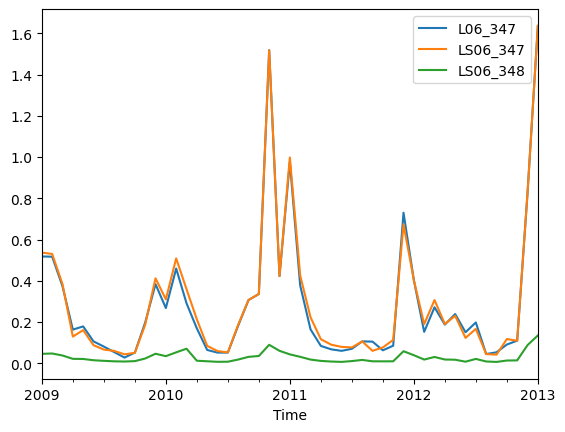

In [47]:
import matplotlib
data.resample('M').mean().plot()

In [48]:
data = pd.DataFrame({'group':['a','a','a','b','b','b','c','c','c'],
                    'data':[4,3,2,1,12,3,4,5,7]})
data

,group,data
0,a,4
1,a,3
2,a,2
3,b,1
4,b,12
5,b,3
6,c,4
7,c,5
8,c,7


In [49]:
data.sort_values(by=['group','data'],ascending = [False,True],inplace=True)
data

,group,data
6,c,4
7,c,5
8,c,7
3,b,1
5,b,3
4,b,12
2,a,2
1,a,3
0,a,4


In [50]:
data = pd.DataFrame({'k1':['one']*3+['two']*4,
                   'k2':[3,2,1,3,3,4,4]})
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [51]:
data.sort_values(by='k2')

,k1,k2
2,one,1
1,one,2
0,one,3
3,two,3
4,two,3
5,two,4
6,two,4


In [53]:
# .drop_duplicates() 去除重複的值
data.drop_duplicates()

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


In [55]:
# subset : Only consider certain columns for identifying duplicates, by default use all of the columns.
data.drop_duplicates(subset='k1')

,k1,k2
0,one,3
3,two,3


In [56]:
data = pd.DataFrame({'food':['A1','A2','B1','B2','B3','C1','C2'],'data':[1,2,3,4,5,6,7]})
data

,food,data
0,A1,1
1,A2,2
2,B1,3
3,B2,4
4,B3,5
5,C1,6
6,C2,7


In [59]:
# DataFrame.apply : Apply a function along an axis of the DataFrame.
# axis{0 or ‘index’, 1 or ‘columns’}, default 0
# Axis along which the function is applied:
# 0 or ‘index’: apply function to each column.
# 1 or ‘columns’: apply function to each row.
def food_map(series):
    if series['food'] == 'A1':
        return 'A'
    elif series['food'] == 'A2':
        return 'A'
    elif series['food'] == 'B1':
        return 'B'
    elif series['food'] == 'B2':
        return 'B'
    elif series['food'] == 'B3':
        return 'B'
    elif series['food'] == 'C1':
        return 'C'
    elif series['food'] == 'C2':
        return 'C'
data['food_map'] = data.apply(food_map,axis= 'columns')
data    

,food,data,food_map
0,A1,1,A
1,A2,2,A
2,B1,3,B
3,B2,4,B
4,B3,5,B
5,C1,6,C
6,C2,7,C


In [60]:
food2Upper = {
    'A1':'A',
    'A2':'A',
    'B1':'B',
    'B2':'B',
    'B3':'B',
    'C1':'C',
    'C2':'C'
}
data['upper'] = data['food'].map(food2Upper)
data

,food,data,food_map,upper
0,A1,1,A,A
1,A2,2,A,A
2,B1,3,B,B
3,B2,4,B,B
4,B3,5,B,B
5,C1,6,C,C
6,C2,7,C,C


In [73]:
import numpy as np
# np.random.randn(x) : Return a sample (or samples) from the “standard normal” distribution.
# x 為幾個
df = pd.DataFrame({'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
# .assign : Assign new columns to a DataFrame.
df2 = df.assign(ratio = df['data1']/df['data2'])
df2

,data1,data2,ratio
0,1.081060,-0.623327,-1.734339
1,0.334857,-0.171433,-1.953284
2,0.066759,-0.503393,-0.132619
3,0.661600,-0.551214,-1.200258
4,0.495937,0.770872,0.643346


In [75]:
df2.drop('ratio',axis='columns',inplace=True)
df2

,data1,data2
0,1.081060,-0.623327
1,0.334857,-0.171433
2,0.066759,-0.503393
3,0.661600,-0.551214
4,0.495937,0.770872


In [76]:
data = pd.Series([1,2,3,4,5,6,7,8,9])
data

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [77]:
data.replace(9,np.nan,inplace=True)
data

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    NaN
dtype: float64

In [78]:
# pd.cut : Bin values into discrete intervals.
ages = [15,18,20,21,22,34,41,52,63,79]
bins = [10,40,80]
bins_res = pd.cut(ages,bins)
bins_res

[(10, 40], (10, 40], (10, 40], (10, 40], (10, 40], (10, 40], (40, 80], (40, 80], (40, 80], (40, 80]]
Categories (2, interval[int64, right]): [(10, 40] < (40, 80]]

In [80]:
# .codes 找出對應的位置
bins_res.codes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int8)

In [81]:
pd.value_counts(bins_res)

(10, 40]    6
(40, 80]    4
dtype: int64

In [82]:
pd.cut(ages, [10,30,50,80])

[(10, 30], (10, 30], (10, 30], (10, 30], (10, 30], (30, 50], (30, 50], (50, 80], (50, 80], (50, 80]]
Categories (3, interval[int64, right]): [(10, 30] < (30, 50] < (50, 80]]

In [83]:
group_names = ['youth', 'Mid', 'Elder']
pd.cut(ages,[10,20,50,80],labels=group_names)

['youth', 'youth', 'youth', 'Mid', 'Mid', 'Mid', 'Mid', 'Elder', 'Elder', 'Elder']
Categories (3, object): ['youth' < 'Mid' < 'Elder']

In [84]:
pd.value_counts(pd.cut(ages,[10,20,50,80],labels=group_names))

Mid      4
youth    3
Elder    3
dtype: int64

In [85]:
df = pd.DataFrame([range(3),[0, np.nan, 0],[0,0,np.nan],range(3)])
df

,0,1,2
0,0,1.0,2.0
1,0,NaN,0.0
2,0,0.0,NaN
3,0,1.0,2.0


In [86]:
df.isnull()

,0,1,2
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False


In [87]:
# .any() Return whether any element is True, potentially over an axis.
df.isnull().any()

0    False
1     True
2     True
dtype: bool

In [88]:
df.isnull().any(axis = 1)

0    False
1     True
2     True
3    False
dtype: bool

In [90]:
# .fillna(x) : 將空值NaN用x替換
df.fillna(5)

,0,1,2
0,0,1.0,2.0
1,0,5.0,0.0
2,0,0.0,5.0
3,0,1.0,2.0


In [91]:
df[df.isnull().any(axis = 1)]

,0,1,2
1,0,NaN,0.0
2,0,0.0,NaN


In [92]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.300195,-0.136019
1,bar,one,-0.822370,1.120230
2,foo,two,1.342783,0.627193
3,bar,three,-1.064149,-0.628803
4,foo,two,-0.274551,0.341881
5,bar,two,-2.419061,0.422089
6,foo,one,-0.112157,0.524684
7,foo,three,1.247329,1.777794


In [95]:
grouped = df.groupby('A')

In [96]:
grouped.count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [97]:
grouped = df.groupby(['A','B'])
grouped.count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [109]:
df

,A,B,C,D
0,foo,one,0.300195,-0.136019
1,bar,one,-0.822370,1.120230
2,foo,two,1.342783,0.627193
3,bar,three,-1.064149,-0.628803
4,foo,two,-0.274551,0.341881
5,bar,two,-2.419061,0.422089
6,foo,one,-0.112157,0.524684
7,foo,three,1.247329,1.777794


In [119]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'a'
    else:
        return 'b'
# axis{0 or ‘index’, 1 or ‘columns’}, default 0
grouped = df.groupby(get_letter_type,axis = 1)
grouped.count().iloc[0]


a    1
b    3
Name: 0, dtype: int64

In [130]:
s = pd.Series([1,2,3,1,2,3],[8,7,5,8,7,5])
s

8    1
7    2
5    3
8    1
7    2
5    3
dtype: int64

In [125]:
# level = 0 為第一行 8 7 5 8 7 5
grouped = s.groupby(level = 0)

In [131]:
grouped.first()

5    3
7    2
8    1
dtype: int64

In [132]:
grouped.last()

5    3
7    2
8    1
dtype: int64

In [133]:
grouped.sum()

5    6
7    4
8    2
dtype: int64

In [138]:
grouped = s.groupby(level = 0,sort = False)

In [139]:
grouped.first()

8    1
7    2
5    3
dtype: int64

In [140]:
df2 = pd.DataFrame({'X':['A','B','A','B'],'Y':[1,2,3,4]})
df2

,X,Y
0,A,1
1,B,2
2,A,3
3,B,4


In [141]:
df2.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [142]:
df2.groupby(['X']).get_group('B')

,X,Y
1,B,2
3,B,4


In [143]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
arrays

[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [146]:
index = pd.MultiIndex.from_arrays(arrays,names = ['first','second'])

In [148]:
s = pd.Series(np.random.randn(8),index = index)
s

first  second
bar    one      -1.949460
       two      -0.162924
baz    one      -0.437558
       two       1.033573
foo    one      -0.259335
       two       1.172953
qux    one      -0.681354
       two      -0.914301
dtype: float64

In [150]:
s.index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [151]:
s.values

array([-1.94945951, -0.1629236 , -0.43755769,  1.03357306, -0.25933515,
        1.17295255, -0.68135439, -0.91430082])

In [149]:
grouped = s.groupby(level = 0)
grouped.sum()

first
bar   -2.112383
baz    0.596015
foo    0.913617
qux   -1.595655
dtype: float64

In [152]:
grouped = s.groupby(level = 1)
grouped.sum()

second
one   -3.327707
two    1.129301
dtype: float64

In [154]:
grouped = s.groupby(level = 'first')
grouped.sum()

first
bar   -2.112383
baz    0.596015
foo    0.913617
qux   -1.595655
dtype: float64

In [155]:
df

,A,B,C,D
0,foo,one,0.300195,-0.136019
1,bar,one,-0.822370,1.120230
2,foo,two,1.342783,0.627193
3,bar,three,-1.064149,-0.628803
4,foo,two,-0.274551,0.341881
5,bar,two,-2.419061,0.422089
6,foo,one,-0.112157,0.524684
7,foo,three,1.247329,1.777794


In [156]:
grouped = df.groupby(['A','B'])
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.822370  1.120230
    three -1.064149 -0.628803
    two   -2.419061  0.422089
foo one    0.188038  0.388666
    three  1.247329  1.777794
    two    1.068232  0.969074

In [157]:
grouped = df.groupby(['A','B'],as_index = False)
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.822370,1.120230
1,bar,three,-1.064149,-0.628803
2,bar,two,-2.419061,0.422089
3,foo,one,0.188038,0.388666
4,foo,three,1.247329,1.777794
5,foo,two,1.068232,0.969074


In [161]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.822370  1.120230
    three -1.064149 -0.628803
    two   -2.419061  0.422089
foo one    0.188038  0.388666
    three  1.247329  1.777794
    two    1.068232  0.969074

In [162]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,-0.822370,1.120230
1,bar,three,-1.064149,-0.628803
2,bar,two,-2.419061,0.422089
3,foo,one,0.188038,0.388666
4,foo,three,1.247329,1.777794
5,foo,two,1.068232,0.969074


In [164]:
grouped = df.groupby(['A','B'])
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [165]:
grouped.describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -0.822370       NaN -0.822370 -0.822370 -0.822370 -0.822370   
    three   1.0 -1.064149       NaN -1.064149 -1.064149 -1.064149 -1.064149   
    two     1.0 -2.419061       NaN -2.419061 -2.419061 -2.419061 -2.419061   
foo one     2.0  0.094019  0.291577 -0.112157 -0.009069  0.094019  0.197107   
    three   1.0  1.247329       NaN  1.247329  1.247329  1.247329  1.247329   
    two     2.0  0.534116  1.143628 -0.274551  0.129782  0.534116  0.938450   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -0.822370   1.0  1.120230       NaN  1.120230  1.120230  1.120230   
    three -1.064149   1.0 -0.628803       NaN -0.628803 -0.628803 -0.628803   
    two   -2.419061   1.0  0.422089       NaN  0.422089  0.422089  0.422089   
foo one    0.300195   2.0  0.194333  0.467188 -0.136019  0.029157  0.194333   
    three  1.247329   1.0  1.777794       NaN  1.777794  1.777794  1.777794   
    two    1.342783   2.0  0.484537  0.201746  0.341881  0.413209  0.484537   

                               
                75%       max  
A   B                          
bar one    1.120230  1.120230  
    three -0.628803 -0.628803  
    two    0.422089  0.422089  
foo one    0.359509  0.524684  
    three  1.777794  1.777794  
    two    0.555865  0.627193

In [166]:
grouped.describe().head()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -0.822370       NaN -0.822370 -0.822370 -0.822370 -0.822370   
    three   1.0 -1.064149       NaN -1.064149 -1.064149 -1.064149 -1.064149   
    two     1.0 -2.419061       NaN -2.419061 -2.419061 -2.419061 -2.419061   
foo one     2.0  0.094019  0.291577 -0.112157 -0.009069  0.094019  0.197107   
    three   1.0  1.247329       NaN  1.247329  1.247329  1.247329  1.247329   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -0.822370   1.0  1.120230       NaN  1.120230  1.120230  1.120230   
    three -1.064149   1.0 -0.628803       NaN -0.628803 -0.628803 -0.628803   
    two   -2.419061   1.0  0.422089       NaN  0.422089  0.422089  0.422089   
foo one    0.300195   2.0  0.194333  0.467188 -0.136019  0.029157  0.194333   
    three  1.247329   1.0  1.777794       NaN  1.777794  1.777794  1.777794   

                               
                75%       max  
A   B                          
bar one    1.120230  1.120230  
    three -0.628803 -0.628803  
    two    0.422089  0.422089  
foo one    0.359509  0.524684  
    three  1.777794  1.777794

In [171]:
grouped = df.groupby('A')
grouped['C'].agg([np.sum,np.mean,np.std])

,sum,mean,std
A,,,
bar,-4.305579,-1.435193,0.860587
foo,2.503599,0.500720,0.755541


In [182]:
grouped['C'].agg(res_std=('std'), res_mean=('mean'),res_sum=('sum'))

,res_std,res_mean,res_sum
A,,,
bar,0.860587,-1.435193,-4.305579
foo,0.755541,0.500720,2.503599


In [187]:
grouped.agg(res_sum=('C','sum'), res_mean=('C','mean'),res_std=('C','std'))

,res_sum,res_mean,res_std
A,,,
bar,-4.305579,-1.435193,0.860587
foo,2.503599,0.500720,0.755541


In [2]:
import pandas as pd
import numpy as np
s = pd.Series(['A','b','B','gaer','AGER',np.nan])
s

0       A
1       b
2       B
3    gaer
4    AGER
5     NaN
dtype: object

In [3]:
s.str.lower()

0       a
1       b
2       b
3    gaer
4    ager
5     NaN
dtype: object

In [4]:
s.str.upper()

0       A
1       B
2       B
3    GAER
4    AGER
5     NaN
dtype: object

In [5]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
dtype: float64

In [6]:
index = pd.Index(['   tang','   yu   ','di'])
index

Index(['   tang', '   yu   ', 'di'], dtype='object')

In [7]:
index.str.strip()

Index(['tang', 'yu', 'di'], dtype='object')

In [8]:
index.str.lstrip()

Index(['tang', 'yu   ', 'di'], dtype='object')

In [9]:
index.str.rstrip()

Index(['   tang', '   yu', 'di'], dtype='object')

In [13]:
df = pd.DataFrame(np.random.randn(3,2),columns = ['A a','B b'],index = range(3))
df

,A a,B b
0,-0.752132,-0.309224
1,1.581949,0.155144
2,3.588240,0.089341


In [20]:
df.columns = df.columns.str.replace(' ','_')
df

,A_a,B_b
0,-0.752132,-0.309224
1,1.581949,0.155144
2,3.588240,0.089341


In [22]:
s = pd.Series(['a_b_C','c_d_e','f_g_h'])
s

0    a_b_C
1    c_d_e
2    f_g_h
dtype: object

In [23]:
s.str.split('_')

0    [a, b, C]
1    [c, d, e]
2    [f, g, h]
dtype: object

In [24]:
# expand : Expand the split strings into separate columns.
# If True, return DataFrame/MultiIndex expanding dimensionality.
# If False, return Series/Index, containing lists of strings.
s.str.split('_',expand = True)

,0,1,2
0,a,b,C
1,c,d,e
2,f,g,h


In [47]:
# n : Limit number of splits in output. None, 0 and -1 will be interpreted as return all splits.
s.str.split('_',expand = True, n = 1)

,0,1
0,a,b_C
1,c,d_e
2,f,g_h


In [48]:
s = pd.Series(['A','Aas','Afgew','Ager','Agre','Ager'])
s

0        A
1      Aas
2    Afgew
3     Ager
4     Agre
5     Ager
dtype: object

In [49]:
s.str.contains('Ag')

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [50]:
s = pd.Series(['a','a|b','a|c'])
s

0      a
1    a|b
2    a|c
dtype: object

In [51]:
s.str.get_dummies(sep = '|')

,a,b,c
0,1,0,0
1,1,1,0
2,1,0,1


In [54]:
s = pd.Series(np.arange(5),index = np.arange(5)[::-1],dtype='int64')
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [55]:
s.isin([1,3,4])

4    False
3     True
2    False
1     True
0     True
dtype: bool

In [68]:
s[s.isin([1,3,4])]

3    1
1    3
0    4
dtype: int64

In [69]:
s2 = pd.Series(np.arange(6), index = pd.MultiIndex.from_product([[0,1],['a','b','c']]))
s2

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int32

In [70]:
s2.iloc[s2.index.isin([(1,'a'),(0,'b')])]

0  b    1
1  a    3
dtype: int32

In [71]:
s2.index.isin([(1,'a'),(0,'b')])

array([False,  True, False,  True, False, False])

In [72]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [73]:
s[s>2]

1    3
0    4
dtype: int64

In [74]:
dates = pd.date_range('20231022',periods=8)

In [76]:
# numpy.random.randn : Return a sample (or samples) from the “standard normal” distribution.
df = pd.DataFrame(np.random.randn(8,4),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2023-10-22,0.565801,0.165612,0.512137,-2.037810
2023-10-23,0.578933,0.111958,0.239350,-0.783900
2023-10-24,-0.578283,0.265181,-0.341544,-0.315694
2023-10-25,-1.377071,0.530275,-0.016528,-0.985975
2023-10-26,-0.736646,-0.535848,0.695120,1.846778
2023-10-27,-0.028488,0.522322,1.345643,1.266521
2023-10-28,-0.388783,0.614481,-1.205858,-0.674986
2023-10-29,0.542367,3.302492,1.602786,0.847727


In [102]:
# DataFrame.loc : Access a group of rows and columns by label(s) or a boolean array.
# df.loc[:, x]return the values. [不指定index:指定columns] 則會返回columns的values
# df.columns.map(lambda x:x=='A') 返回布林值[True ,False, False, False]
# lambda函數 -> lambda 變數 : expression(運算)
df.loc[:,df.columns.map(lambda x:x=='A')]

,A
2023-10-22,0.565801
2023-10-23,0.578933
2023-10-24,-0.578283
2023-10-25,-1.377071
2023-10-26,-0.736646
2023-10-27,-0.028488
2023-10-28,-0.388783
2023-10-29,0.542367


In [105]:
df.where(df < 0)

,A,B,C,D
2023-10-22,NaN,NaN,NaN,-2.037810
2023-10-23,NaN,NaN,NaN,-0.783900
2023-10-24,-0.578283,NaN,-0.341544,-0.315694
2023-10-25,-1.377071,NaN,-0.016528,-0.985975
2023-10-26,-0.736646,-0.535848,NaN,NaN
2023-10-27,-0.028488,NaN,NaN,NaN
2023-10-28,-0.388783,NaN,-1.205858,-0.674986
2023-10-29,NaN,NaN,NaN,NaN


In [106]:
# df.where() Replace values where the condition is False.
df.where(df < 0, -df)

,A,B,C,D
2023-10-22,-0.565801,-0.165612,-0.512137,-2.037810
2023-10-23,-0.578933,-0.111958,-0.239350,-0.783900
2023-10-24,-0.578283,-0.265181,-0.341544,-0.315694
2023-10-25,-1.377071,-0.530275,-0.016528,-0.985975
2023-10-26,-0.736646,-0.535848,-0.695120,-1.846778
2023-10-27,-0.028488,-0.522322,-1.345643,-1.266521
2023-10-28,-0.388783,-0.614481,-1.205858,-0.674986
2023-10-29,-0.542367,-3.302492,-1.602786,-0.847727


In [107]:
df.where(df < 0,999)

,A,B,C,D
2023-10-22,999.000000,999.000000,999.000000,-2.037810
2023-10-23,999.000000,999.000000,999.000000,-0.783900
2023-10-24,-0.578283,999.000000,-0.341544,-0.315694
2023-10-25,-1.377071,999.000000,-0.016528,-0.985975
2023-10-26,-0.736646,-0.535848,999.000000,999.000000
2023-10-27,-0.028488,999.000000,999.000000,999.000000
2023-10-28,-0.388783,999.000000,-1.205858,-0.674986
2023-10-29,999.000000,999.000000,999.000000,999.000000


In [108]:
df = pd.DataFrame(np.random.rand(10,3),columns = list('abc'))
df

,a,b,c
0,0.434904,0.877605,0.936997
1,0.068772,0.665609,0.906097
2,0.894891,0.934056,0.449785
3,0.212892,0.506589,0.484536
4,0.393671,0.378788,0.662168
5,0.874496,0.851862,0.449085
6,0.615690,0.946360,0.743054
7,0.339031,0.269822,0.318443
8,0.594799,0.818775,0.324563
9,0.686889,0.807915,0.140805


In [113]:
# df.query() : Query the columns of a DataFrame with a boolean expression.
df.query('a<b')

,a,b,c
0,0.434904,0.877605,0.936997
1,0.068772,0.665609,0.906097
2,0.894891,0.934056,0.449785
3,0.212892,0.506589,0.484536
6,0.615690,0.946360,0.743054
8,0.594799,0.818775,0.324563
9,0.686889,0.807915,0.140805


In [115]:
df.query('a<c')

,a,b,c
0,0.434904,0.877605,0.936997
1,0.068772,0.665609,0.906097
3,0.212892,0.506589,0.484536
4,0.393671,0.378788,0.662168
6,0.615690,0.946360,0.743054


In [123]:
df.query('a<b & b<c')

,a,b,c
0,0.434904,0.877605,0.936997
1,0.068772,0.665609,0.906097


In [124]:
df.query('a<b and b<c')

,a,b,c
0,0.434904,0.877605,0.936997
1,0.068772,0.665609,0.906097


<AxesSubplot:>

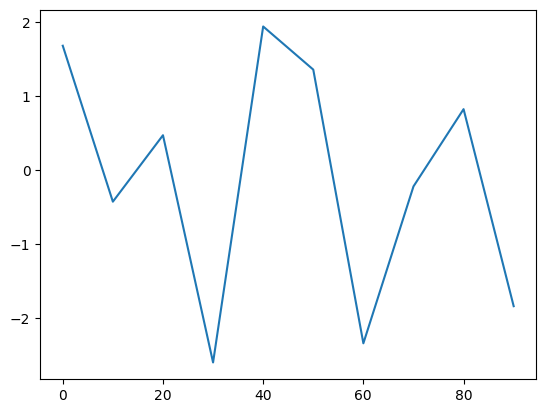

In [126]:
import matplotlib
s = pd.Series(np.random.randn(10), index = np.arange(0,100,10))
s.plot()

In [128]:
s

0     1.676727
10   -0.428189
20    0.468834
30   -2.598577
40    1.936595
50    1.354468
60   -2.339964
70   -0.222112
80    0.820732
90   -1.838831
dtype: float64

In [130]:
df = pd.DataFrame(np.random.randn(10,4),
                 index = np.arange(0, 100, 10),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.843861,-1.359803,-1.087201,0.119231
10,-0.248794,0.279578,-0.073223,0.606573
20,-0.081288,0.216505,-1.125582,0.724434
30,0.183789,-0.002776,-0.083571,-1.439246
40,0.444358,0.037376,-0.747984,-0.252528
50,-1.314207,-0.936186,-0.212490,-0.017053
60,1.271640,-1.735084,-0.251218,-0.558846
70,0.455568,0.230414,0.797614,-0.155849
80,0.939808,0.572166,-1.193590,1.624715
90,-0.841724,-0.859778,0.870300,-0.682457


In [133]:
df

,A,B,C,D
0,-0.607393,0.470872,-1.784218,0.639774
10,-0.995922,0.658348,-3.346484,2.877691
20,-1.359022,0.835033,-4.485204,1.236918
30,-2.622742,-1.378218,-4.245179,1.268388
40,-3.101840,-2.597924,-4.155739,3.890835
50,-2.095087,-3.911371,-3.990784,2.736787
60,-3.309435,-5.594589,-5.041634,2.645026
70,-2.061286,-4.719486,-3.998056,3.518362
80,-2.759248,-5.898136,-3.941519,3.124481
90,-1.896539,-5.851593,-3.822864,3.320283


In [134]:
# .cumsum() : Return cumulative sum over a DataFrame or Series axis.
# axis:{0 or ‘index’, 1 or ‘columns’}, default 0
df.cumsum(0)

,A,B,C,D
0,-0.607393,0.470872,-1.784218,0.639774
10,-1.603315,1.129220,-5.130702,3.517464
20,-2.962337,1.964253,-9.615906,4.754383
30,-5.585079,0.586035,-13.861086,6.022771
40,-8.686919,-2.011888,-18.016824,9.913607
50,-10.782007,-5.923259,-22.007608,12.650394
60,-14.091441,-11.517848,-27.049242,15.295420
70,-16.152727,-16.237334,-31.047298,18.813782
80,-18.911975,-22.135470,-34.988818,21.938263
90,-20.808514,-27.987063,-38.811682,25.258546


In [135]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 index = np.arange(0, 100, 10),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,3.020450,1.118963,-0.101383,-2.034908
10,1.951579,1.695606,0.640174,-1.989649
20,1.788947,2.426021,2.515839,-3.056492
30,3.008594,0.829903,2.147780,-1.153877
40,2.551548,0.150609,2.193113,0.051101
50,1.495825,0.122933,0.990950,0.041715
60,-1.139355,0.569121,-0.673055,0.663428
70,-0.838248,-0.575992,0.156515,0.767913
80,-0.797328,0.788331,0.098210,1.172076
90,-0.991916,1.939608,-0.840460,0.313308


<AxesSubplot:>

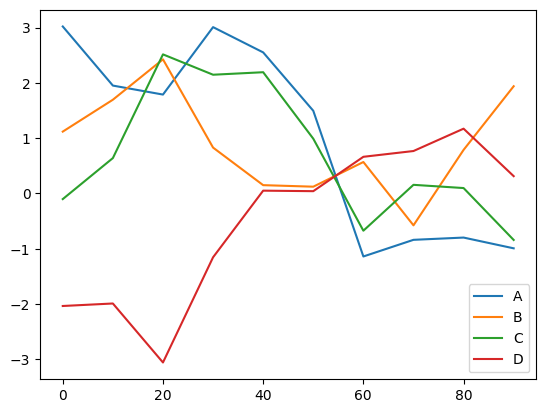

In [136]:
df.plot()

<AxesSubplot:>

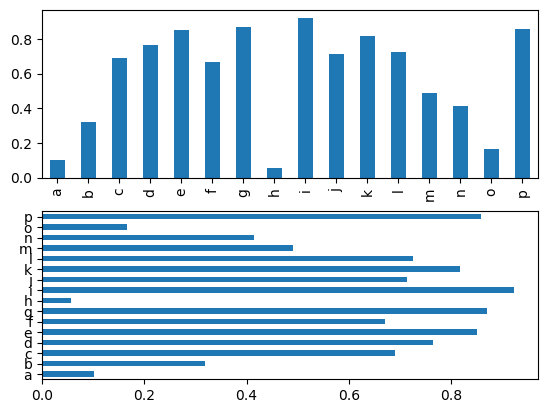

In [139]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot(ax = axes[0],kind='bar') # axes[0] 為第一個圖
data.plot(ax = axes[1],kind='barh') # axes[1] 為第二個圖

In [140]:
# name : Name to be stored in the index.
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

df

Genus,A,B,C,D
one,0.625364,0.491471,0.040058,0.533211
two,0.062664,0.126918,0.349839,0.011185
three,0.847044,0.693709,0.744625,0.263623
four,0.373309,0.839723,0.707873,0.550619
five,0.394149,0.728992,0.251264,0.602206
six,0.006883,0.844348,0.730115,0.013505


<AxesSubplot:>

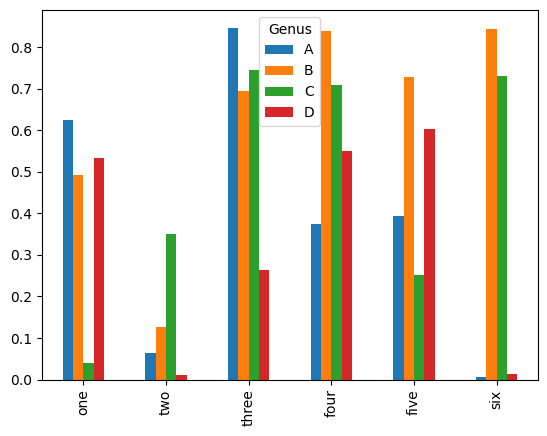

In [141]:
df.plot(kind='bar')

In [143]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:ylabel='Frequency'>

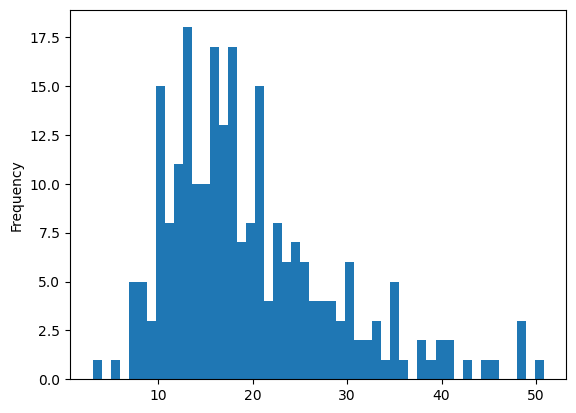

In [161]:
# bins : If bins is an integer, it defines the number of equal-width bins in the range.
# 當bins = int 時，代表直方圖中bin的個數是int個
tips.total_bill.plot(kind='hist',bins=50) # 所以有50個bins

In [3]:
macro = pd.read_csv('macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
data = macro[['quarter','realgdp','realcons']]
data

,quarter,realgdp,realcons
0,1.0,2710.349,1707.4
1,2.0,2778.801,1733.7
2,3.0,2775.488,1751.8
3,4.0,2785.204,1753.7
4,1.0,2847.699,1770.5
...,...,...,...
198,3.0,13324.600,9267.7
199,4.0,13141.920,9195.3
200,1.0,12925.410,9209.2
201,2.0,12901.504,9189.0


<AxesSubplot:xlabel='quarter', ylabel='realgdp'>

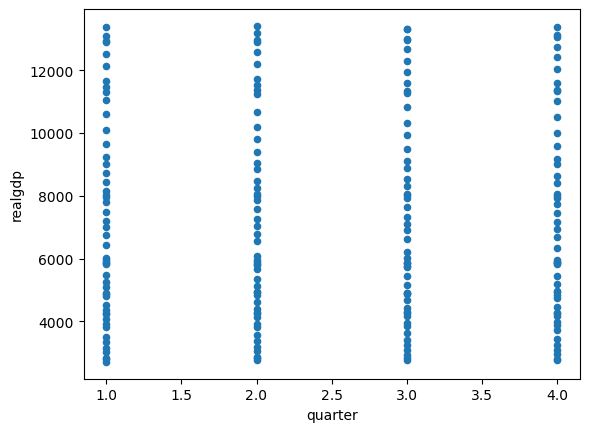

In [168]:
data.plot.scatter('quarter','realgdp')

array([[<AxesSubplot:xlabel='quarter', ylabel='quarter'>,
        <AxesSubplot:xlabel='realgdp', ylabel='quarter'>,
        <AxesSubplot:xlabel='realcons', ylabel='quarter'>],
       [<AxesSubplot:xlabel='quarter', ylabel='realgdp'>,
        <AxesSubplot:xlabel='realgdp', ylabel='realgdp'>,
        <AxesSubplot:xlabel='realcons', ylabel='realgdp'>],
       [<AxesSubplot:xlabel='quarter', ylabel='realcons'>,
        <AxesSubplot:xlabel='realgdp', ylabel='realcons'>,
        <AxesSubplot:xlabel='realcons', ylabel='realcons'>]], dtype=object)

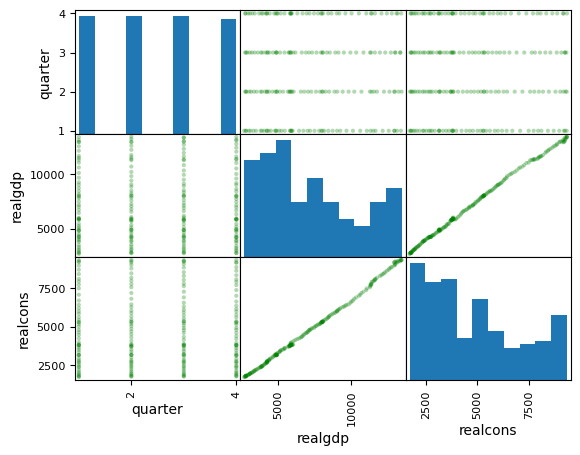

In [8]:
import pandas as pd
import matplotlib
# Draw a matrix of scatter plots
# 散點圖矩陣圖可以發現兩兩特徵的關係
pd.plotting.scatter_matrix(data, color='g',alpha=0.3)

In [1]:
import pandas as pd
import matplotlib 
gl = pd.read_csv('game_logs.csv')
gl.head()

<ipython-input-1-dfff027bfebc>:3: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  gl = pd.read_csv('game_logs.csv')


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [2]:
gl.shape

(171907, 161)

In [3]:
gl.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 544.2 MB


In [6]:
for dtype in ['float64', 'int64', 'object']:
    selected_dtype = gl.select_dtypes(include = [dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b/1024**2
    print('平均內存占用',dtype,mean_usage_mb)

平均內存占用 float64 1.2947325095152245
平均內存占用 int64 1.124192374093192
平均內存占用 object 5.510331491880779


In [11]:
# np.iinfo() : Machine limits for integer types.
import numpy as np
int_types = ['uint8', 'int8', 'int16', 'int32', 'int64']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [3]:
# isinstance(object, classinfo) : Return True if the object argument is an instance of the classinfo argument
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b/1024**2
    return '{:03.2f} MB'.format(usage_mb) # .2f小數點兩位, 03代表至少輸出三個數(包括.)
gl_int = gl.select_dtypes(include = ['int64'])
# pd.to_numeric : pd.to_numeric
# ‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)
# ‘unsigned’: smallest unsigned int dtype (min.: np.uint8)
# ‘float’: smallest float dtype (min.: np.float32)
converted_int = gl_int.apply(pd.to_numeric, downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))

7.87 MB
1.48 MB


In [5]:
gl_float = gl.select_dtypes(include=['float64'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(gl_float))
print(mem_usage(converted_float))

100.99 MB
50.49 MB


In [6]:
optimized_gl = gl.copy()

optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(gl))
print(mem_usage(optimized_gl))

544.17 MB
487.29 MB


In [7]:
# For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
# For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.
gl_obj = gl.select_dtypes(include = ['object']).copy()
gl_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19200904,,0,6,36",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


In [8]:
dow = gl_obj.day_of_week
dow.head()

0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: object

In [14]:
dow_cat = dow.astype('category')
dow_cat.head()

0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [15]:
# .cat : Accessor object for categorical properties of the Series values.
# .codes 按照上面Categories順序找出排列位置
dow_cat.head(10).cat.codes

0    4
1    0
2    2
3    1
4    5
5    4
6    2
7    2
8    1
9    5
dtype: int8

In [17]:
print(mem_usage(dow))
print(mem_usage(dow_cat))

5.25 MB
0.16 MB


In [19]:
converted_obj = pd.DataFrame()

for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]
        
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))

435.32 MB
38.59 MB


In [21]:
date = optimized_gl.date
date[:5]

0    18710504
1    18710505
2    18710506
3    18710508
4    18710509
Name: date, dtype: uint32

In [22]:
print(mem_usage(date))

0.66 MB


In [25]:
optimized_gl['date'] = pd.to_datetime(date, format='%Y%m%d')
optimized_gl.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,1871-05-06,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,1871-05-08,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,1871-05-09,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [26]:
print(mem_usage(optimized_gl['date']))

1.31 MB


In [27]:
optimized_gl['date'][:5]

0   1871-05-04
1   1871-05-05
2   1871-05-06
3   1871-05-08
4   1871-05-09
Name: date, dtype: datetime64[ns]